In [1]:
import numpy as np
import mitsuba as mi 
mi.set_variant("cuda_ad_rgb")
from PDE2D import PATH
import os
from PDE2D.utils.sketch import *
root_directory = os.path.join(PATH, "output2D", "finite_differences", "discrete-circle")
from PDE2D.BoundaryShape import *
from PDE2D.Coefficient import *
import matplotlib.pyplot as plt
from matplotlib import gridspec
import matplotlib
import matplotlib.ticker as ticker
from PDE2D.Solver import *

In [2]:
colors = ["grey", "darkcyan", "darkturquoise", "paleturquoise"]
col_width = COLUMN_WIDTH
linewidth = 1
frame_color = "white"
e_size = 3
objx = -0.4
objy = -0.3
objr = 0.3
x = 0.2
y = 0.2
radius = 0.2
fd_step = 5e-3
seed = 0
seedobj = 222
iter = 512
res = 256
injection = "skip3"
distance = 0.01

In [3]:
fd_file = os.path.join(root_directory, "fd-vals", f"{injection}-ref-{objx}-{objy}-{objr}-current-{x}-{y}-{radius}-fd{fd_step}")
normalder_file = os.path.join(root_directory, "normalder", f"{injection}-{x}-{y}-{radius}")
prb_file = os.path.join(root_directory, "prb", f"{injection}-ref-{objx}-{objy}-{objr}-current-{x}-{y}-{radius}")



normal_der = []
r_fd = []
x_fd = []
y_fd = []
for i in range(iter):
    r_fd.append(np.load(os.path.join(root_directory, fd_file, f"r-{seedobj}-{i}.npy")))
    x_fd.append(np.load(os.path.join(root_directory, fd_file, f"x-{seedobj}-{i}.npy")))
    y_fd.append(np.load(os.path.join(root_directory, fd_file, f"y-{seedobj}-{i}.npy")))

prb_r_01 = np.load(os.path.join(root_directory, prb_file, f"resnormal{res}-d0.01-{seedobj}-r.npy"))
prb_x_01 = np.load(os.path.join(root_directory, prb_file, f"resnormal{res}-d0.01-{seedobj}-x.npy"))
prb_y_01 = np.load(os.path.join(root_directory, prb_file, f"resnormal{res}-d0.01-{seedobj}-y.npy"))
prb_r_1 = np.load(os.path.join(root_directory, prb_file, f"resnormal{res}-d0.1-{seedobj}-r.npy"))
prb_x_1 = np.load(os.path.join(root_directory, prb_file, f"resnormal{res}-d0.1-{seedobj}-x.npy"))
prb_y_1 = np.load(os.path.join(root_directory, prb_file, f"resnormal{res}-d0.1-{seedobj}-y.npy"))
prb_r_2 = np.load(os.path.join(root_directory, prb_file, f"resnormal{res}-d0.2-{seedobj}-r.npy"))
prb_x_2 = np.load(os.path.join(root_directory, prb_file, f"resnormal{res}-d0.2-{seedobj}-x.npy"))
prb_y_2 = np.load(os.path.join(root_directory, prb_file, f"resnormal{res}-d0.2-{seedobj}-y.npy"))

r_fd = np.array(r_fd)
x_fd = np.array(x_fd)
y_fd = np.array(y_fd)
#normal_der = np.array(normal_der)

In [4]:
r_fd = r_fd.mean(axis = 0).sum()
x_fd = x_fd.mean(axis = 0).sum()
y_fd = y_fd.mean(axis = 0).sum()

In [5]:
print(r_fd)
print(x_fd)
print(y_fd)
print(prb_r_01)
print(prb_x_01)
print(prb_y_01)

-0.29177436
1.382667
1.1945508
-0.29291597211786896
1.3841166103670182
1.1957982357091808


GPL Ghostscript 9.55.0: Can't embed the complete font LinBiolinumT as it is too large, embedding a subset.
GPL Ghostscript 9.55.0: Can't embed the complete font LinLibertineT as it is too large, embedding a subset.


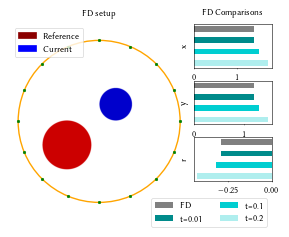

In [6]:
origin = np.array([x, y])

origin_obj = np.array([objx, objy])
radius_obj = objr

in_shape_obj = CircleShape(origin = origin_obj, radius = radius_obj)

in_shape = CircleShape(origin = origin, radius = radius)
out_shape =    CircleWithElectrodes(is_delta=True)
shape = BoundaryWithDirichlets(out_boundary= out_shape, dirichlet_boundaries=[in_shape])


data_holder = DataHolder(shape)
wos = WostConstant(data_holder)

names = ["FD", "t=0.01", "t=0.1", "t=0.2"]

grad_rad = np.array([r_fd,
                     prb_r_01,
                     prb_r_1,
                     prb_r_2]).squeeze()

grad_x   = np.array([x_fd,
                     prb_x_01,
                     prb_x_1,
                     prb_x_2]).squeeze()


grad_y   = np.array([y_fd,
                     prb_y_01,
                     prb_y_1,
                     prb_y_2]).squeeze()



grad_rad = np.array(grad_rad) 
grad_x = np.array(grad_x) 
grad_y =np.array(grad_y) 

fig = plt.figure(figsize= ((col_width, col_width * 0.75))) 
scale = 0.5
s2 = 5
s1 = 3
s_legend = 2
im_size = 3 * s1 + s_legend
scale = col_width / (3 * s1 + s_legend)
g = gridspec.GridSpec((3 * s1 + s_legend) , (3 * s1 + s2 + s_legend), figure = fig, wspace = 0.5, hspace=2.1)
ax = fig.add_subplot(g[:,:])
disable_ticks(ax)
plt.setp(ax.spines.values(), color=frame_color)
ax_shape = fig.add_subplot(g[:, :im_size])
ax_x = fig.add_subplot(g[:s1, im_size:])
ax_y = fig.add_subplot(g[s1:2*s1, im_size:])
ax_r = fig.add_subplot(g[2 * s1: 3 * s1, im_size:])
ax_legend = fig.add_subplot(g[3 * s1:, im_size:])

ax_legend.axis("off")
 
bbox_plot = [[-1.1,-1.1],[1.1,1.1]]
resolution_plot = [2048, 2048]
image = in_shape_obj.sketch_image(ax_shape, bbox = bbox_plot, resolution = resolution_plot, channel = 0)
image = in_shape.sketch_image(ax_shape, bbox = bbox_plot, resolution = resolution_plot, image = image, channel = 2)
black_region = image.sum(axis = 2) < 0.1
image[black_region]  = 1
ax_shape.imshow(image)
out_shape.sketch(ax_shape, bbox = bbox_plot, resolution = resolution_plot, lw = linewidth, e_size = e_size)
#electrode_holder.sketch(ax_shape, bbox = bbox_plot, resolution = resolution_plot, conf_number = 0, lw = linewidth, ps = 2 * e_size)

width = 0.5  # the width of the bars
multiplier = 0
for i, grad_r in enumerate(grad_rad):
    offset = width * multiplier
    rects = ax_r.barh(4 - i + offset, grad_r, width, color = colors[i], label = names[i])
    
for i, gradx in enumerate(grad_x):
    offset = width * multiplier
    rects = ax_x.barh(4 - i + offset, gradx, width, color = colors[i], label = names[i])

for i, grady in enumerate(grad_y):
    offset = width * multiplier
    rects = ax_y.barh(4 - i + offset, grady, width, color = colors[i], label = names[i])
    
ax_x.set_yticks([])
ax_y.set_yticks([])
ax_r.set_yticks([])

ax_x.set_ylabel("x")
ax_y.set_ylabel("y")
ax_r.set_ylabel("r")

ax_shape.set_title("FD setup", fontsize = DEFAULT_FONTSIZE_SMALL, pad = 12)
ax_x.set_title("FD Comparisons", fontsize = DEFAULT_FONTSIZE_SMALL)

handles, labels = ax_r.get_legend_handles_labels()
ax_legend.legend(handles, labels, loc = "upper right",  ncol = 2)

import matplotlib.patches as mpatches

red_patch = mpatches.Patch(color='darkred', label='Reference')
blue_patch = mpatches.Patch(color='blue', label='Current')
#magenta_patch = mpatches.Patch(color='mediumvioletred', label='Intersection')
ax_ref = fig.add_subplot(g[:1,:1])
disable_ticks(ax_ref)
disable_border(ax_ref)
ax_ref.legend(handles=[red_patch, blue_patch], loc = "upper left")
#fig.savefig("fd-sphere.pdf", bbox_inches='tight', pad_inches=0.04, dpi=300)
save_fig("fd-sphere", os.path.join(PATH, "figures"))
plt.savefig(os.path.join(PATH, "figures", "png", "fd-sphere.png"), bbox_inches='tight', pad_inches=0.04, dpi=1000)